In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk #natural language tool kit
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
A = pd.read_csv('G:\SRM\MHDS\My Projects\ML\Sentiment Analysis\Mental Health Project\Extracterd tweets\Data from 5-11\MH__rts.csv',encoding = 'latin')
B = pd.read_csv('G:\SRM\MHDS\My Projects\ML\Sentiment Analysis\Mental Health Project\Extracterd tweets\Data from 17-23\MH_rts.csv',encoding = 'latin')
df = pd.concat([A, B], ignore_index=True)
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,quoted_status_permalink,quote_count,timestamp_ms,reply_count,filter_level,query,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable
0,2022-10-10 18:38:08,1.579459e+18,1579458762578198529,"Every breath, a breakthrough. In honor of #Wor...",False,195,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-10 23:47:04,1.579537e+18,1579536505881886720,@liamgallagher @TalkClubUK Im feeling good at...,False,147,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""http://twitter.com/download/iphone"" r...",1.579455e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-10 04:35:00,1.579247e+18,1579246579944460289,"This #WorldMentalHealthDay, recognize that men...",False,116,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""https://about.twitter.com/products/tw...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-11 13:09:37,1.579738e+18,1579738476291198977,RT @RingCentral: Today is RingCentrals quarte...,False,140,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""recent"", iso_language_code...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-11 13:09:36,1.579738e+18,1579738472788918273,RT @ftaw16_: A Tigrayan woman said that a sold...,False,139,"list(hashtags = list(text = NA, indices = list...","list(result_type = ""recent"", iso_language_code...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13622,2022-10-17 23:48:17,1.582074e+18,1582073530744987649,Join me in my free workshop to learn more: \n...,False,259,"list(hashtags = list(text = c(""raisinggreatkid...","list(iso_language_code = ""en"", result_type = ""...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13623,2022-10-17 23:48:04,1.582073e+18,1582073472896770048,Slots available for next week. \n\nContact us ...,False,276,"list(hashtags = list(text = c(""CAMHS"", ""eating...","list(iso_language_code = ""en"", result_type = ""...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13624,2022-09-02 08:58:23,1.565542e+18,1565542123021438977,National Nutrition Week 2022: à®¤à¯à®à®¿à®¯ ...,False,205,"list(hashtags = list(text = c(""NationalNutriti...","list(iso_language_code = ""ta"", result_type = ""...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13625,2022-09-01 16:16:57,1.565290e+18,1565290105190748161,#à®¤à¯à®à®¿à®¯ à®à®à¯à®à®à¯à®à®¤à¯à®...,False,59,"list(hashtags = list(text = c(""à®¤à¯à®à®¿à®¯...","list(iso_language_code = ""ta"", result_type = ""...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'text', 'favorited_by', 'scopes', 'display_text_width',
       'quoted_status_permalink', 'quote_count', 'timestamp_ms', 'reply_count',
       'filter_level', 'query', 'withheld_scope', 'withheld_copyright',
       'withheld_in_countries', 'possibly_sensitive_appealable'],
      dtype='object')

In [4]:
df.dtypes

created_at                        object
id                               float64
id_str                             int64
full_text                         object
truncated                           bool
display_text_range                 int64
entities                          object
metadata                          object
source                            object
in_reply_to_status_id            float64
in_reply_to_status_id_str        float64
in_reply_to_user_id              float64
in_reply_to_user_id_str          float64
in_reply_to_screen_name           object
geo                               object
coordinates                       object
place                             object
contributors                     float64
is_quote_status                     bool
retweet_count                      int64
favorite_count                     int64
favorited                           bool
retweeted                           bool
possibly_sensitive                object
lang            

In [5]:
df['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
       '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://www.linkedin.com/" rel="nofollow">LinkedIn</a>',
       '<a href="https://app.sendible.com" rel="nofollow">Sendible</a>',
       '<a href="https://ifttt.com" rel="nofollow">IFTTT</a>',
       '<a href="https://www.echobox.com" rel="nofollow">Echobox</a>',
       '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>',
       '<a href="https://orlo.tech" rel="nofollow">Orlo</a>',
       '<a href="https://buffer.com" rel="nofollow">Buffer</a>',
       '<a href="http://gainapp.com" rel="nofollow">Gain 

In [6]:
df['source'].value_counts()

<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                                             3925
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                  3153
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>                                2750
<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>                                                771
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>                                  352
                                                                                                                    ... 
<a href="https://www.twitter.com" rel="nofollow">uwf.london</a>                                                        1
<a href="https://www.childabusesurvivor.net" rel="nofollow">Survivors Network</a>                                      1
<a href="https://www.clickasnap.

In [7]:
df['source'].value_counts().nlargest(30)

<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                  3925
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>       3153
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>     2750
<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>                     771
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       352
<a href="https://buffer.com" rel="nofollow">Buffer</a>                                    280
<a href="https://sproutsocial.com" rel="nofollow">Sprout Social</a>                       229
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>         197
<a href="https://rafiki-app.herokuapp.com/api/v1/rafiki" rel="nofollow">101rafiki</a>     104
<a href="https://www.make.com" rel="nofollow">Make (formerly Integromat)</a>               88
<a href="https://www.later.com" rel="nofollow">LaterMedia</a

<AxesSubplot:>

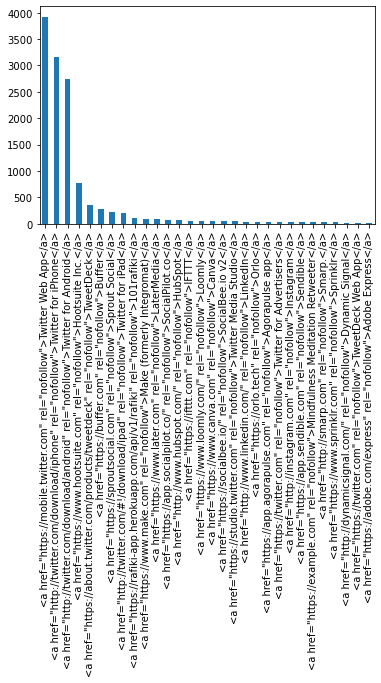

In [8]:
df['source'].value_counts().nlargest(30).plot(kind='bar')

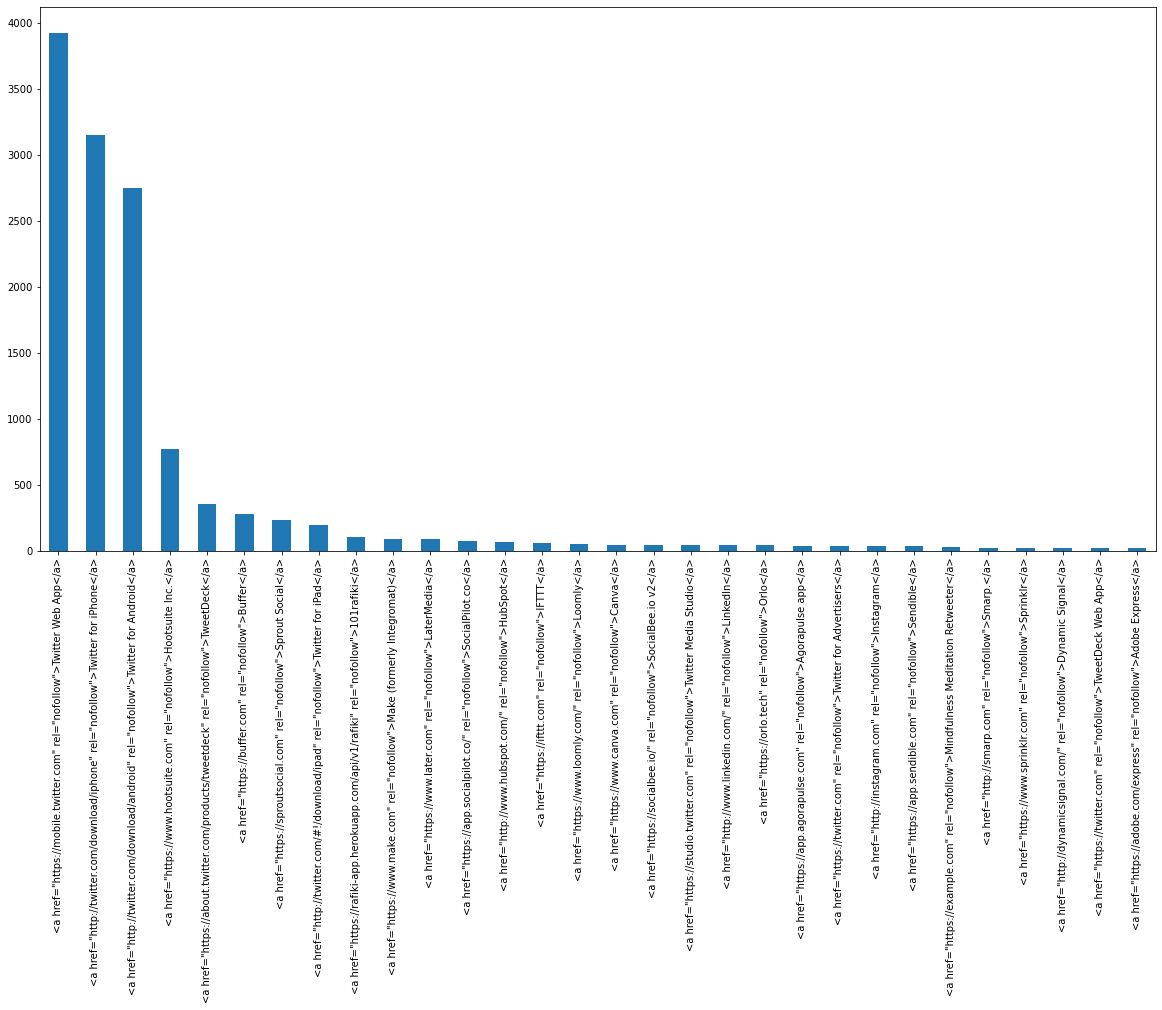

In [9]:
plt.figure(figsize = (20,10))
df['source'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [10]:
import neattext.functions as nfx

In [11]:
df['text'].iloc[0]

'Every breath, a breakthrough.\xa0In honor of\xa0#WorldMentalHealthDay I wanted to share\xa0the trailer for my documentary Selena Gomez: My Mind &amp; Me.\xa0November 4 on @AppleTVPlus https://t.co/h8bkDd9mmV https://t.co/2D4HixbCjL'

In [12]:
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,quoted_status_permalink,quote_count,timestamp_ms,reply_count,filter_level,query,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable
0,2022-10-10 18:38:08,1.579459e+18,1579458762578198529,"Every breath, a breakthrough. In honor of #Wor...",False,195,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-10 23:47:04,1.579537e+18,1579536505881886720,@liamgallagher @TalkClubUK Im feeling good at...,False,147,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""http://twitter.com/download/iphone"" r...",1.579455e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-10 04:35:00,1.579247e+18,1579246579944460289,"This #WorldMentalHealthDay, recognize that men...",False,116,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""https://about.twitter.com/products/tw...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-11 13:09:37,1.579738e+18,1579738476291198977,RT @RingCentral: Today is RingCentrals quarte...,False,140,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""recent"", iso_language_code...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-11 13:09:36,1.579738e+18,1579738472788918273,RT @ftaw16_: A Tigrayan woman said that a sold...,False,139,"list(hashtags = list(text = NA, indices = list...","list(result_type = ""recent"", iso_language_code...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df['text'].apply(nfx.extract_hashtags)

0                                  [#WorldMentalHealthDay]
1                                  [#WorldMentalHealthDay]
2                                 [#WorldMentalHealthDay,]
3                                 [#WorldMentalHealthDay.]
4                                                       []
                               ...                        
13622    [#raisinggreatkids, #parenting, #children, #me...
13623    [#CAMHS, #eatingdisorders, #parentchild, #fami...
13624    [#NationalNutritionWeek, #nationalnutritionwee...
13625           [#à®¤à¯à®à®¿à®¯, #NationalNutritionWeek]
13626    [#NationalNutritionWeek, #healthylifestyle, #H...
Name: text, Length: 13627, dtype: object

In [14]:
df['extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)

In [15]:
df['extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)

In [16]:
df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)

In [17]:
df[['text','clean_tweet']]

,text,clean_tweet
0,"Every breath, a breakthrough. In honor of #Wor...","Every breath, a breakthrough. In honor of I ..."
1,@liamgallagher @TalkClubUK Im feeling good at...,@liamgallagher @TalkClubUK Im feeling good at...
2,"This #WorldMentalHealthDay, recognize that men...",This recognize that mental health is as impo...
3,RT @RingCentral: Today is RingCentrals quarte...,RT @RingCentral: Today is RingCentrals quarte...
4,RT @ftaw16_: A Tigrayan woman said that a sold...,RT @ftaw16_: A Tigrayan woman said that a sold...
...,...,...
13622,Join me in my free workshop to learn more: \n...,Join me in my free workshop to learn more: \n...
13623,Slots available for next week. \n\nContact us ...,Slots available for next week. \n\nContact us ...
13624,National Nutrition Week 2022: à®¤à¯à®à®¿à®¯ ...,National Nutrition Week 2022: à®¤à¯à®à®¿à®¯ ...
13625,#à®¤à¯à®à®¿à®¯ à®à®à¯à®à®à¯à®à®¤à¯à®...,à®à®à¯à®à®à¯à®à®¤à¯à®¤à¯ à®µà®¾à®°à...


In [18]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : nfx.remove_userhandles(x))

In [19]:
df[['text','clean_tweet']]

,text,clean_tweet
0,"Every breath, a breakthrough. In honor of #Wor...","Every breath, a breakthrough. In honor of I ..."
1,@liamgallagher @TalkClubUK Im feeling good at...,"Im feeling good at the moment, 8/10. Agre..."
2,"This #WorldMentalHealthDay, recognize that men...",This recognize that mental health is as impo...
3,RT @RingCentral: Today is RingCentrals quarte...,RT Today is RingCentrals quarterly CaRing D...
4,RT @ftaw16_: A Tigrayan woman said that a sold...,RT A Tigrayan woman said that a soldier and ...
...,...,...
13622,Join me in my free workshop to learn more: \n...,Join me in my free workshop to learn more: \n...
13623,Slots available for next week. \n\nContact us ...,Slots available for next week. \n\nContact us ...
13624,National Nutrition Week 2022: à®¤à¯à®à®¿à®¯ ...,National Nutrition Week 2022: à®¤à¯à®à®¿à®¯ ...
13625,#à®¤à¯à®à®¿à®¯ à®à®à¯à®à®à¯à®à®¤à¯à®...,à®à®à¯à®à®à¯à®à®¤à¯à®¤à¯ à®µà®¾à®°à...


In [20]:
df['clean_tweet'].iloc[10]

"RT   This World Mental Health Day, let's create awareness and be compassionate towards people facing mental health issues. It i\x85"

In [21]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [22]:
df['clean_tweet'].iloc[10]

"RT This World Mental Health Day, let's create awareness and be compassionate towards people facing mental health issues. It i\x85"

In [23]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [24]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [25]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_numbers)

In [26]:
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_stopwords)

## TOPIC MODELLING

In [27]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
from nltk import word_tokenize, pos_tag

nltk.download('wordnet')
stemmer = PorterStemmer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\meera\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
df['clean_tweet'].describe()

count                                                 13627
unique                                                12772
top       corporate looters sent bills expired card zero...
freq                                                     66
Name: clean_tweet, dtype: object

In [29]:
df['clean_tweet'].head()

0    breath breakthrough honor wanted share trailer...
1    Im feeling good moment / Agree its good talk...
2    recognize mental health important physical hea...
3    RT Today RingCentrals quarterly CaRing Day ob...
4    RT Tigrayan woman said soldier civilians gang ...
Name: clean_tweet, dtype: object

In [32]:
data = df.dropna(subset=['clean_tweet'])
data

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,timestamp_ms,reply_count,filter_level,query,withheld_scope,withheld_copyright,withheld_in_countries,possibly_sensitive_appealable,extracted_hashtags,clean_tweet
0,2022-10-10 18:38:08,1.579459e+18,1579458762578198529,"Every breath, a breakthrough. In honor of #Wor...",False,195,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[#WorldMentalHealthDay],breath breakthrough honor wanted share trailer...
1,2022-10-10 23:47:04,1.579537e+18,1579536505881886720,@liamgallagher @TalkClubUK Im feeling good at...,False,147,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""http://twitter.com/download/iphone"" r...",1.579455e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[#WorldMentalHealthDay],Im feeling good moment / Agree its good talk...
2,2022-10-10 04:35:00,1.579247e+18,1579246579944460289,"This #WorldMentalHealthDay, recognize that men...",False,116,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""popular"", iso_language_cod...","<a href=""https://about.twitter.com/products/tw...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[#WorldMentalHealthDay,]",recognize mental health important physical hea...
3,2022-10-11 13:09:37,1.579738e+18,1579738476291198977,RT @RingCentral: Today is RingCentrals quarte...,False,140,"list(hashtags = list(text = ""WorldMentalHealth...","list(result_type = ""recent"", iso_language_code...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[#WorldMentalHealthDay.],RT Today RingCentrals quarterly CaRing Day ob...
4,2022-10-11 13:09:36,1.579738e+18,1579738472788918273,RT @ftaw16_: A Tigrayan woman said that a sold...,False,139,"list(hashtags = list(text = NA, indices = list...","list(result_type = ""recent"", iso_language_code...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],RT Tigrayan woman said soldier civilians gang ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13622,2022-10-17 23:48:17,1.582074e+18,1582073530744987649,Join me in my free workshop to learn more: \n...,False,259,"list(hashtags = list(text = c(""raisinggreatkid...","list(iso_language_code = ""en"", result_type = ""...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[#raisinggreatkids, #parenting, #children, #me...",Join free workshop learn more: learn visit You...
13623,2022-10-17 23:48:04,1.582073e+18,1582073472896770048,Slots available for next week. \n\nContact us ...,False,276,"list(hashtags = list(text = c(""CAMHS"", ""eating...","list(iso_language_code = ""en"", result_type = ""...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[#CAMHS, #eatingdisorders, #parentchild, #fami...",Slots available week Contact child looking sup...
13624,2022-09-02 08:58:23,1.565542e+18,1565542123021438977,National Nutrition Week 2022: à®¤à¯à®à®¿à®¯ ...,False,205,"list(hashtags = list(text = c(""NationalNutriti...","list(iso_language_code = ""ta"", result_type = ""...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[#NationalNutritionWeek, #nationalnutritionwee...",National Nutrition Week : à®¤à¯à®à®¿à®¯ à®à...
13625,2022-09-01 16:16:57,1.565290e+18,1565290105190748161,#à®¤à¯à®à®¿à®¯ à®à®à¯à®à®à¯à®à®¤à¯à®...,False,59,"list(hashtags = list(text = c(""à®¤à¯à®à®¿à®¯...","list(iso_language_code = ""ta"", result_type = ""...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[#à®¤à¯à®à®¿à®¯, #NationalNutritionWeek]",à®à®à¯à®à®à¯à®à®¤à¯à®¤à¯ à®µà®¾à®°à®®à¯


In [34]:
#To check the text content we can use a list
df['clean_tweet'].tolist()[:5]

['breath breakthrough honor wanted share trailer documentary Selena Gomez: Mind amp November',
 'I\x92m feeling good moment / Agree it\x92s good talk Hope you\x92re alright',
 'recognize mental health important physical health care',
 'RT Today RingCentral\x92s quarterly CaRing Day observance encourage employees',
 'RT Tigrayan woman said soldier civilians gang raped months spoke said']

In [35]:
t = df['clean_tweet'].to_list()
for i in range(5):
    print('Tweet Number '+str(i+1)+': '+t[i])

Tweet Number 1: breath breakthrough honor wanted share trailer documentary Selena Gomez: Mind amp November
Tweet Number 2: Im feeling good moment / Agree its good talk Hope youre alright
Tweet Number 3: recognize mental health important physical health care
Tweet Number 4: RT Today RingCentrals quarterly CaRing Day observance encourage employees
Tweet Number 5: RT Tigrayan woman said soldier civilians gang raped months spoke said


In [36]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [37]:
tokens = word_tokenize("hi this is ren")

nltk.pos_tag(tokens)

[('hi', 'NN'), ('this', 'DT'), ('is', 'VBZ'), ('ren', 'JJ')]

In [38]:
def lemmatize_stemming(text):
   
    token=word_tokenize(text)
  
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, get_wordnet_pos(nltk.pos_tag(token)[0][1])))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [39]:
preProcessedText = df["clean_tweet"].apply(preprocess)
titlesWithoutDupes = df["clean_tweet"].drop_duplicates()
titlesWithoutDupes

0        breath breakthrough honor wanted share trailer...
1        Im feeling good moment / Agree its good talk...
2        recognize mental health important physical hea...
3        RT Today RingCentrals quarterly CaRing Day ob...
4        RT Tigrayan woman said soldier civilians gang ...
                               ...                        
13622    Join free workshop learn more: learn visit You...
13623    Slots available week Contact child looking sup...
13624    National Nutrition Week : à®¤à¯à®à®¿à®¯ à®à...
13625    à®à®à¯à®à®à¯à®à®¤à¯à®¤à¯ à®µà®¾à®°à®®à¯
13626    Nutrition: à®¤à¯à®à®¿à®¯ à®à®à¯à®à®à¯à...
Name: clean_tweet, Length: 12772, dtype: object

In [40]:
preProcessedText
preProcessedTextWithoutComments = titlesWithoutDupes.apply(preprocess)
preProcessedTextWithoutComments

0        [breath, breakthrough, honor, want, share, tra...
1        [feel, good, moment, agre, good, talk, hope, a...
2        [recogn, mental, health, import, physic, healt...
3        [today, ringcentr, quarterli, care, observ, en...
4        [tigrayan, woman, say, soldier, civilian, gang...
                               ...                        
13622    [join, free, workshop, learn, learn, visit, yo...
13623    [slot, avail, week, contact, child, look, supp...
13624                               [nation, nutrit, week]
13625                                                   []
13626                                             [nutrit]
Name: clean_tweet, Length: 12772, dtype: object

In [41]:
dictionary = gensim.corpora.Dictionary(preProcessedText)
dictionaryWithoutComents = gensim.corpora.Dictionary(preProcessedTextWithoutComments)

In [42]:
bow_corpus = [dictionary.doc2bow(doc) for doc in preProcessedText]
bow_corpusWithoutComments = [dictionaryWithoutComents.doc2bow(doc) for doc in preProcessedTextWithoutComments]

In [50]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 3, 
                                   id2word = dictionary,                                    
                                   passes = 20,
                                   workers = 2)
lda_model.show_topics()

C:\Users\meera\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.011*"feel" + 0.010*"time" + 0.008*"thing" + 0.008*"good" + 0.007*"talk" + 0.007*"like" + 0.007*"today" + 0.007*"mind" + 0.006*"thank" + 0.006*"live"'),
 (1,
  '0.042*"health" + 0.041*"mental" + 0.010*"issu" + 0.009*"support" + 0.009*"peopl" + 0.008*"care" + 0.006*"help" + 0.006*"improv" + 0.006*"need" + 0.006*"month"'),
 (2,
  '0.047*"mental" + 0.044*"health" + 0.016*"support" + 0.014*"help" + 0.013*"octob" + 0.013*"wellb" + 0.012*"join" + 0.012*"world" + 0.010*"monday" + 0.008*"peopl"')]

In [51]:
lda_model_after_removing_dupes = gensim.models.LdaMulticore(bow_corpusWithoutComments,num_topics = 3,id2word = dictionaryWithoutComents,
                                                           passes = 20,workers=2)
lda_model_after_removing_dupes.show_topics()

C:\Users\meera\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.046*"mental" + 0.045*"health" + 0.019*"join" + 0.016*"octob" + 0.014*"wellb" + 0.013*"support" + 0.013*"monday" + 0.011*"free" + 0.010*"world" + 0.008*"event"'),
 (1,
  '0.011*"feel" + 0.010*"love" + 0.009*"life" + 0.008*"know" + 0.008*"time" + 0.008*"help" + 0.007*"like" + 0.007*"go" + 0.006*"thing" + 0.006*"need"'),
 (2,
  '0.051*"mental" + 0.050*"health" + 0.014*"help" + 0.014*"support" + 0.012*"peopl" + 0.011*"need" + 0.011*"awar" + 0.009*"care" + 0.008*"import" + 0.007*"struggl"')]

## LDA visualization before removing duplicates from titltes

In [52]:
import pyLDAvis
import pyLDAvis.gensim_models

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(LDAvis_prepared)

C:\Users\meera\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## LDA visualization after removing duplicates from titles

In [53]:
LDAvis_duples = pyLDAvis.gensim_models.prepare(lda_model_after_removing_dupes,bow_corpusWithoutComments,dictionaryWithoutComents)
pyLDAvis.display(LDAvis_duples)

C:\Users\meera\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
